In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import h5py 
import scipy
from PIL import Image
from scipy import ndimage

## Import Dataset

In [2]:
# data_dict = pd.read_json("train_dataset/train.json")
df1 = pd.read_csv("color.csv")

In [3]:
df1.head()

,filename,color,label
0,GREEN_1.jpg,green,1
1,GREEN_2.jpg,green,1
2,GREEN_3.jpg,green,1
3,GREEN_4.jpg,green,1
4,GREEN_5.jpg,green,1


In [16]:
df1.shape

(2095, 3)

## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split 
X = df1['filename']
Y = df1['label']
X1, x_test, Y1, y_test = train_test_split(X,Y,test_size=0.2,train_size=0.8,random_state=42) 
x_train, x_cv, y_train, y_cv = train_test_split(X1,Y1,test_size = 0.25,train_size =0.75,random_state=42)

#X1 and Y1 are the features and targets for the training set
#x_test and y_test are the features and targets for the test set

#Overall Data Distribution
#Training Data: 60% of the original dataset (80% * 75%)
#Cross-Validation Data: 20% of the original dataset (80% * 25%)
#Testing Data: 20% of the original dataset (as directly specified in the first split)

In [18]:
x_test

210     GREEN_211.jpg
1169      RED_147.jpg
1146      RED_124.jpg
879     GREEN_880.jpg
29       GREEN_30.jpg
            ...      
1941      RED_919.jpg
1337      RED_315.jpg
2083     RED_1061.jpg
393     GREEN_394.jpg
1554      RED_532.jpg
Name: filename, Length: 419, dtype: object

In [19]:
y_test

210     1
1169    0
1146    0
879     1
29      1
       ..
1941    0
1337    0
2083    0
393     1
1554    0
Name: label, Length: 419, dtype: int64

In [22]:
y_train.value_counts()

label
0    638
1    619
Name: count, dtype: int64

In [23]:
print("label 0: ",len(y_test) - y_test.sum())
print("label 1: ", y_test.sum())

label 0:  214
label 1:  205


In [24]:
print("label 0: ",len(y_cv) - y_cv.sum())
print("label 1: ", y_cv.sum())

label 0:  220
label 1:  199


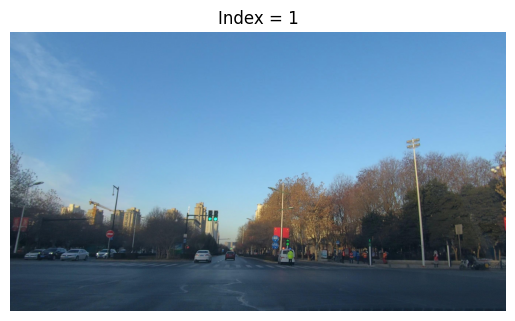

In [25]:
import matplotlib.pyplot as plt
from PIL import Image
Index = 1000
# Load the image file
image = Image.open(X[Index])

# Display the image
plt.imshow(image)
plt.title('Index = 1')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


In [26]:
import numpy as np
from PIL import Image

def load_images(image_paths, new_size=(128, 128)):
    images = []
    for path in image_paths:
        # Open the image file
        with Image.open(path) as img:
            # Resize the image
            img = img.resize(new_size)
            # Convert the image to a numpy array and normalize pixel values
            img_array = np.array(img) / 255.0
            images.append(img_array)
    return np.array(images)


## Load Images

In [27]:
# Example lists of image paths
train_image_paths = x_train
test_image_paths = x_test
cv_image_paths = x_cv

# Load images
X_train_image = load_images(train_image_paths)
x_test_image = load_images(test_image_paths)
x_cv_image = load_images(cv_image_paths)


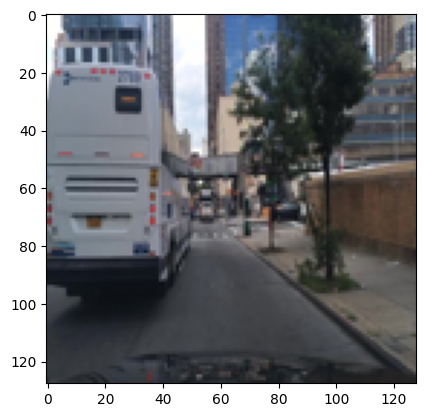

In [28]:
plt.imshow(X_train_image[1])

In [29]:
y_train[1]

1

In [30]:
y_train = np.array(y_train)  # Assuming Y is already defined
y_test = np.array(y_test)
y_cv = np.array(y_cv)

Y_reshaped = y_train.reshape(1, -1)
y_test_reshaped = y_test.reshape(1,-1)
y_cv_reshaped = y_cv.reshape(1, -1)

print("New shape:", Y_reshaped.shape)
print("New shape:", y_test_reshaped.shape)
print("New shape:", y_cv_reshaped.shape)


New shape: (1, 1257)
New shape: (1, 419)
New shape: (1, 419)


In [31]:
# Find the values below:
m_train = X_train_image.shape[0]
m_test = x_test_image.shape[0]
m_cv = x_cv_image.shape[0]

num_px = X_train_image.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Number of testing examples: m_cv = " + str(m_cv))

print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)") # 3 -> R, G, B
print ("train_set_x shape: " + str(X_train_image.shape)) 
print ("train_set_y shape: " + str(Y_reshaped.shape))
print ("test_set_x shape: " + str(x_test_image.shape)) 
print ("test_set_y shape: " + str(y_test_reshaped.shape))
print ("x_cv shape: " + str(x_cv_image.shape)) 
print ("y_cv shape: " + str(y_cv_reshaped.shape))

Number of training examples: m_train = 1257
Number of testing examples: m_test = 419
Number of testing examples: m_cv = 419
Height/Width of each image: num_px = 128
Each image is of size: (128, 128, 3)
train_set_x shape: (1257, 128, 128, 3)
train_set_y shape: (1, 1257)
test_set_x shape: (419, 128, 128, 3)
test_set_y shape: (1, 419)
x_cv shape: (419, 128, 128, 3)
y_cv shape: (1, 419)


## Reshaping Image

In [32]:
# Reshape the training and test examples
train_set_x = X_train_image.reshape(X_train_image.shape[0],-1).T # 64*64*3=12288
test_set_x = x_test_image.reshape(x_test_image.shape[0],-1).T
cv_set_x = x_cv_image.reshape(x_cv_image.shape[0],-1).T


print ("train_set_x_flatten shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(Y_reshaped.shape))
print ("test_set_x_flatten shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(y_test_reshaped.shape))
print ("cv_set_x_flatten shape: " + str(cv_set_x.shape))
print ("cv_set_y shape: " + str(y_cv_reshaped.shape))
print ("sanity check after reshaping: " + str(train_set_x[0:50,0]))

train_set_x_flatten shape: (49152, 1257)
train_set_y shape: (1, 1257)
test_set_x_flatten shape: (49152, 419)
test_set_y shape: (1, 419)
cv_set_x_flatten shape: (49152, 419)
cv_set_y shape: (1, 419)
sanity check after reshaping: [0.7254902  0.87058824 0.90588235 0.75686275 0.90196078 0.92941176
 0.69803922 0.8627451  0.89803922 0.67058824 0.83921569 0.88235294
 0.69019608 0.85490196 0.90196078 0.70588235 0.85490196 0.90980392
 0.7254902  0.8745098  0.91372549 0.74117647 0.89411765 0.91764706
 0.75686275 0.89803922 0.92156863 0.78039216 0.91764706 0.9372549
 0.8        0.9372549  0.95294118 0.78039216 0.9254902  0.94509804
 0.74117647 0.89411765 0.9254902  0.74509804 0.89411765 0.92156863
 0.74509804 0.89411765 0.9254902  0.73333333 0.88235294 0.91764706
 0.74117647 0.89019608]


## Tensorflow

### A) Build Model in Tensorflow

#### Import

In [33]:
import tensorflow as tf
# check the version
tf.__version__

'2.16.1'

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image

In [35]:
tf.random.set_seed(42)

#### Load Data

In [40]:
print("train X shape: ", train_set_x.shape) # X_train: numpy array with shape: (num_samples_train, num_features)
print("train y shape: ", Y_reshaped.shape) # y_train: numpy array with shape: (num_samples_train,)
print("test X shape: ", test_set_x.shape)   # X_test: numpy array with shape: (num_samples_test, num_features)
print("test y shape: ", y_test_reshaped.shape)   # y_test: numpy array with shape: (num_samples_test,)

train X shape:  (1257, 49152)
train y shape:  (1257, 1)
test X shape:  (419, 49152)
test y shape:  (1, 419)


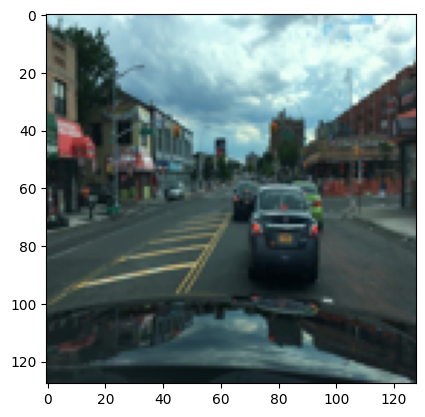

label: 0


In [37]:
# Display one of the images

i = 0
img = X_train_image[i]
plt.imshow(img)
plt.show()
print(f"label: {Y_reshaped[0][i]}")

In [38]:
# Assuming train_X and test_X are your input data variables
train_set_x = train_set_x.T  # Transpose to shape (1429, 12288)
cv_set_x = cv_set_x.T    # Transpose to shape (477, 12288)
test_set_x = test_set_x.T    # Transpose to shape (477, 12288)
Y_reshaped = Y_reshaped.T  # Transposing to shape (1429, 1)
y_cv_reshaped = y_cv_reshaped.T

In [39]:
print("train X shape: ", train_set_x.shape) # X_train: numpy array with shape: (num_samples_train, num_features)
print("train y shape: ", Y_reshaped.shape) # y_train: numpy array with shape: (num_samples_train,)
print("test X shape: ", cv_set_x.shape)   # X_test: numpy array with shape: (num_samples_test, num_features)
print("test y shape: ", y_cv_reshaped.shape)   # y_test: numpy array with shape: (num_samples_test,)

train X shape:  (1257, 49152)
train y shape:  (1257, 1)
test X shape:  (419, 49152)
test y shape:  (419, 1)


## HW6

### Q1. Use the dataset from your previous Homework and the best NN model you have so far.
a. Create a TF checkpoint. Run your previous NN model and save the best weights
    after training.


In [104]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path_NN = 'model_checkpoints/checkpointNN.weights.h5'
checkpointNN = ModelCheckpoint(filepath=checkpoint_path_NN,
                             save_freq='epoch',
                             save_best_only=True, 
                             save_weights_only=True,
                             verbose=1)

In [105]:
model = Sequential([
    Dense(12, activation="relu", input_shape=[train_set_x.shape[1],]),
    BatchNormalization(), 
    Dense(8, activation='relu'),
    BatchNormalization(),  # <- Batch normalization layer 3
    Dense(4, activation='relu'),
    BatchNormalization(),  # <- Batch normalization layer 3
    Dense(1, activation = 'sigmoid')
])

model.summary()

c:\Users\Ting\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 12)             │       589,836 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12)             │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 590,077 (2.25 MB)

 Trainable params: 590,029 (2.25 MB)

 Non-trainable params: 48 (192.00 B)


Epoch 1: val_loss improved from inf to 0.96628, saving model to model_checkpoints/checkpointNN.weights.h5

Epoch 2: val_loss did not improve from 0.96628

Epoch 3: val_loss did not improve from 0.96628

Epoch 4: val_loss did not improve from 0.96628

Epoch 5: val_loss did not improve from 0.96628

Epoch 6: val_loss improved from 0.96628 to 0.85743, saving model to model_checkpoints/checkpointNN.weights.h5

Epoch 7: val_loss improved from 0.85743 to 0.79074, saving model to model_checkpoints/checkpointNN.weights.h5

Epoch 8: val_loss improved from 0.79074 to 0.74375, saving model to model_checkpoints/checkpointNN.weights.h5

Epoch 9: val_loss improved from 0.74375 to 0.72477, saving model to model_checkpoints/checkpointNN.weights.h5

Epoch 10: val_loss did not improve from 0.72477

Epoch 11: val_loss did not improve from 0.72477

Epoch 12: val_loss improved from 0.72477 to 0.71915, saving model to model_checkpoints/checkpointNN.weights.h5

Epoch 13: val_loss did not improve from 0.7191

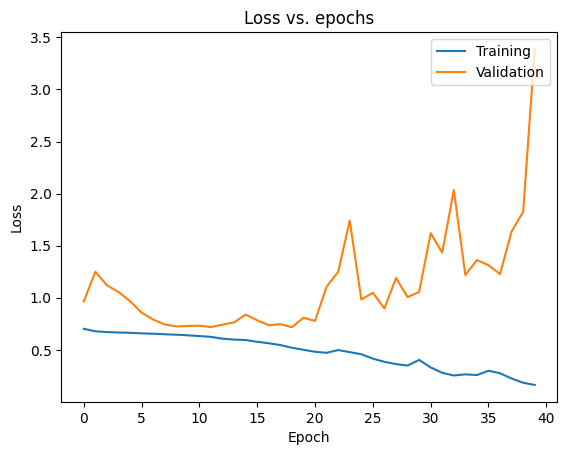

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.6316 - loss: 1.7308
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5004 - loss: 2.9524 
train loss: 1.9183546304702759 | train accuracy: 0.6252983212471008
test loss: 3.0081875324249268 | test accuracy: 0.4988066852092743


In [106]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = [tf.keras.metrics.BinaryAccuracy()]
)
history = model.fit(train_set_x, Y_reshaped, epochs=40, batch_size=64, verbose=0, validation_split=0.2, callbacks=[checkpointNN])

df = pd.DataFrame(history.history)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

train_loss, train_accuracy = model.evaluate(train_set_x, Y_reshaped)
loss, accuracy = model.evaluate(cv_set_x,y_cv_reshaped)

print(f"train loss: {train_loss} | train accuracy: {train_accuracy}")
print(f"test loss: {loss} | test accuracy: {accuracy}")

### Q2. Build a CNN model.
##### a. The model should have four Conv1, Pool1, Conv2, and Pool2 layers, a flattened layer, followed by your FC layers.
##### b. Save the best weights for your CNN model after training.
##### c. Plot loss and metric(s) graphs.


In [45]:
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D, MaxPooling2D

In [63]:

checkpoint_path_CNN = 'model_checkpoints/checkpointCNN.weights.h5'
checkpointCNN = ModelCheckpoint(filepath=checkpoint_path_CNN,
                             save_freq='epoch',
                             save_best_only=True, 
                             save_weights_only=True,
                             verbose=1)


In [64]:
model = Sequential([
    Conv2D(filters=16, input_shape=(128, 128, 3), kernel_size=(3, 3), # image shape: 256-3+1 = 254
               activation='relu', name='conv_1'),
    MaxPooling2D(pool_size=(2, 2), name='pool_1'), # image shape: 254/2 = 127
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu', name='conv_2'),
    MaxPooling2D(pool_size=(2, 2), name='pool_2'),
    Flatten(name='flatten'),
    Dense(16, activation="relu"),
    BatchNormalization(), 
    Dense(8, activation='relu'),
    BatchNormalization(),  # <- Batch normalization layer 3
    Dense(4, activation='relu'),
    BatchNormalization(),  # <- Batch normalization layer 3
    Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 61, 61, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 30, 30, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 16)             │       115,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,113 (457.47 KB)

 Trainable params: 117,057 (457.25 KB)

 Non-trainable params: 56 (224.00 B)


Epoch 1: val_loss improved from inf to 0.71413, saving model to model_checkpoints/checkpointCNN.weights.h5

Epoch 2: val_loss did not improve from 0.71413

Epoch 3: val_loss improved from 0.71413 to 0.67531, saving model to model_checkpoints/checkpointCNN.weights.h5

Epoch 4: val_loss did not improve from 0.67531

Epoch 5: val_loss did not improve from 0.67531

Epoch 6: val_loss did not improve from 0.67531

Epoch 7: val_loss did not improve from 0.67531

Epoch 8: val_loss did not improve from 0.67531

Epoch 9: val_loss did not improve from 0.67531

Epoch 10: val_loss did not improve from 0.67531

Epoch 11: val_loss did not improve from 0.67531

Epoch 12: val_loss did not improve from 0.67531

Epoch 13: val_loss did not improve from 0.67531

Epoch 14: val_loss did not improve from 0.67531

Epoch 15: val_loss did not improve from 0.67531

Epoch 16: val_loss did not improve from 0.67531

Epoch 17: val_loss did not improve from 0.67531

Epoch 18: val_loss did not improve from 0.67531

Ep

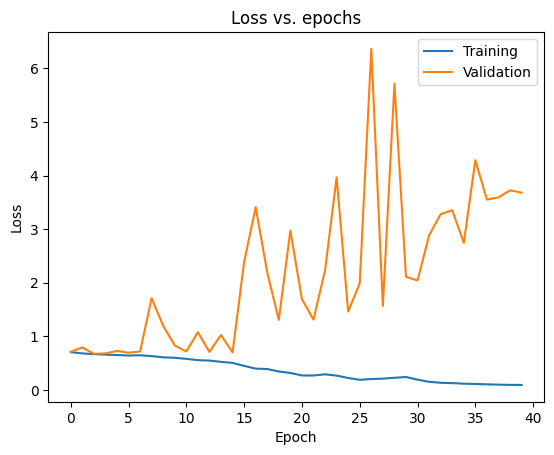

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.9181 - loss: 0.2962
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.6130 - loss: 3.1850
train loss: 0.8879289627075195 | train accuracy: 0.8544152975082397
test loss: 3.3253471851348877 | test accuracy: 0.6038185954093933


In [65]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = [tf.keras.metrics.BinaryAccuracy()]
)
history = model.fit(X_train_image, Y_reshaped, epochs=40, batch_size=64, validation_split=0.2, verbose=0, callbacks=[checkpointCNN])

df = pd.DataFrame(history.history)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

train_loss, train_accuracy = model.evaluate(X_train_image, Y_reshaped)
loss, accuracy = model.evaluate(x_cv_image,y_cv_reshaped)

print(f"train loss: {train_loss} | train accuracy: {train_accuracy}")
print(f"test loss: {loss} | test accuracy: {accuracy}")

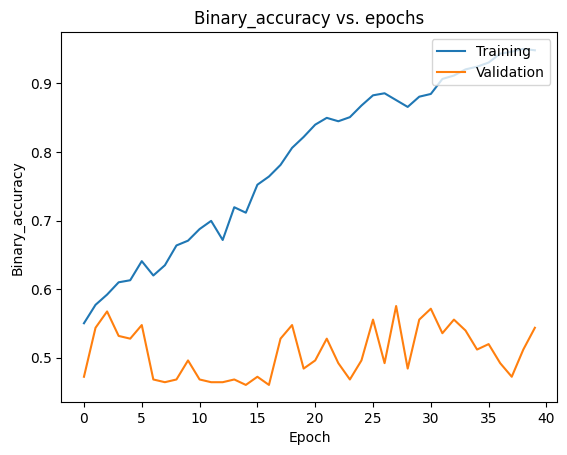

In [66]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Binary_accuracy vs. epochs')
plt.ylabel('Binary_accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## Q3. Compare your previous model and your CNN model.
##### a. Load the weights from your previous NN model and your CNN model.
##### b. Randomly select 5 images from the test set.
##### c. Using your previous model, predict the corresponding labels. Similarly, using your CNN model, predict the corresponding labels. Display the images with their predicted labels.
##### d. Does your CNN model beat the performance of your previous NN model?


In [67]:
modelNN = Sequential([
    Dense(16, activation="relu", input_shape=[train_set_x.shape[1],]),
    BatchNormalization(), 
    Dense(8, activation='relu'),
    BatchNormalization(),  # <- Batch normalization layer 3
    Dense(4, activation='relu'),
    BatchNormalization(),  # <- Batch normalization layer 3
    Dense(1, activation = 'sigmoid')
])


# Load the weights
modelNN.load_weights(checkpoint_path_NN)

modelNN.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 16)             │       786,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 786,737 (3.00 MB)

 Trainable params: 786,681 (3.00 MB)

 Non-trainable params: 56 (224.00 B)

In [68]:
#CNN model
modelCNN = Sequential([
    Conv2D(filters=16, input_shape=(128, 128, 3), kernel_size=(3, 3), # image shape: 256-3+1 = 254
               activation='relu', name='conv_1'),
    MaxPooling2D(pool_size=(2, 2), name='pool_1'), # image shape: 254/2 = 127
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu', name='conv_2'),
    MaxPooling2D(pool_size=(2, 2), name='pool_2'),
    Flatten(name='flatten'),
    Dense(16, activation="relu"),
    BatchNormalization(), 
    Dense(8, activation='relu'),
    BatchNormalization(),  # <- Batch normalization layer 3
    Dense(4, activation='relu'),
    BatchNormalization(),  # <- Batch normalization layer 3
    Dense(1, activation = 'sigmoid')
])

# Load the weights
modelCNN.load_weights(checkpoint_path_CNN)

modelCNN.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 61, 61, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 30, 30, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 16)             │       115,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,113 (457.47 KB)

 Trainable params: 117,057 (457.25 KB)

 Non-trainable params: 56 (224.00 B)

In [119]:
# Assuming test_set_x is a numpy array and you want to select five unique indices
random_indices = np.random.choice(test_set_x.shape[0], size=5, replace=False)

print("Randomly selected indices:", random_indices)


Randomly selected indices: [160 285 336   0 230]


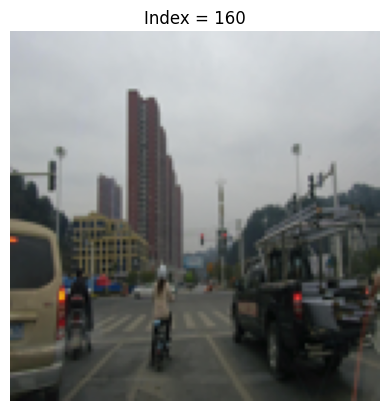

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Actual y value:0
Model NN prediction:0
Model CNN prediction:0


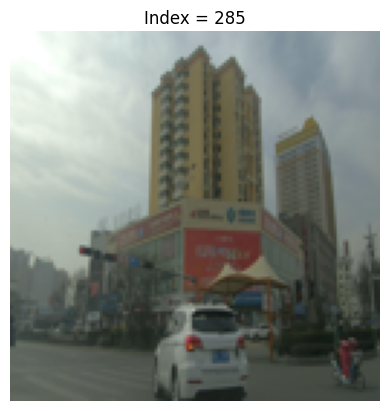

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Actual y value:0
Model NN prediction:0
Model CNN prediction:0


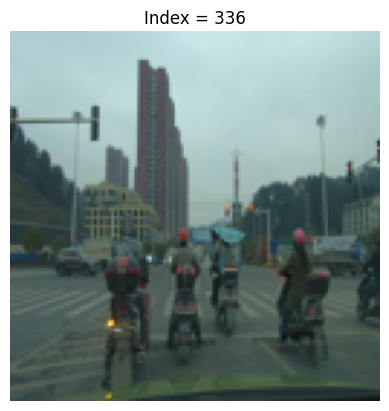

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Actual y value:0
Model NN prediction:0
Model CNN prediction:0


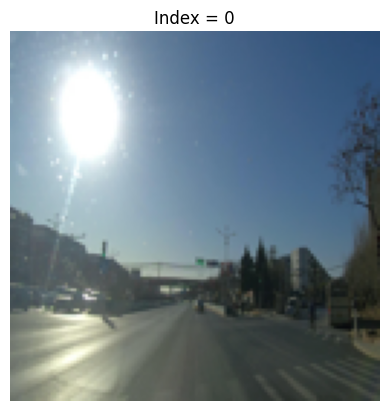

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Actual y value:1
Model NN prediction:0
Model CNN prediction:0


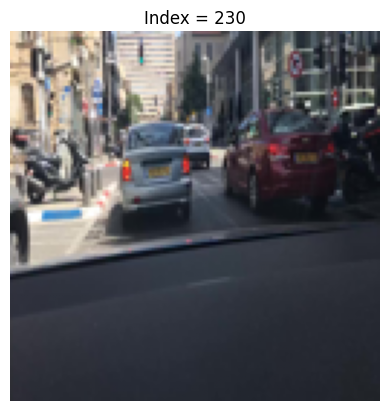

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Actual y value:1
Model NN prediction:0
Model CNN prediction:0


In [121]:
for i in random_indices:
    plt.imshow(x_test_image[i])
    plt.title(f'Index = {i}')
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

    
    input_data = np.expand_dims(test_set_x[i], axis=0)

    # Now input_data has the shape (1, ...), which is what the model expects.
    predictionNN = modelNN.predict(input_data)
    predicted_class = np.argmax(predictionNN)
    
    sample = x_test_image[i,:]
    predictionCNN = modelCNN.predict(sample[np.newaxis,...])
    predicted_classCNN = np.argmax(predictionCNN)
    
    print(f"Actual y value:{y_test_reshaped[0][i]}")
    print(f"Model NN prediction:{predicted_class}")
    print(f"Model CNN prediction:{predicted_classCNN}")

In [123]:
for i in random_indices:
    print(y_test_reshaped[0][i])

0
0
0
1
1


In [74]:
x_train_image_pretrain = load_images(train_image_paths, new_size=(224, 224))
x_cv_image_pretrain = load_images(cv_image_paths, new_size=(224, 224))
x_test_image_pretrain = load_images(test_image_paths, new_size=(224, 224))

## Q5. Use the best pre-trained from Q4 and build a CNN model. Report if your accuracies improve using this pre-trained model. Feel free to modify/add your own dense layers.


### VGG

In [75]:
checkpoint_path_VGG = 'model_checkpoints/checkpointVGG.weights.h5'
checkpointVGG = ModelCheckpoint(filepath=checkpoint_path_VGG,
                             save_freq='epoch',
                             save_best_only=True, 
                             save_weights_only=True,
                             verbose=1)


In [76]:
# build Sequential model, iterate over VGG (without dense layers and output layer)
modelV = Sequential()
vgg_model = tf.keras.applications.vgg16.VGG16()
for layer in vgg_model.layers:
    modelV.add(layer)
# modelV.summary()
# set trainable=False for all layers
# we don't want to train them again
for layer in modelV.layers:
    layer.trainable = False
# model2.add(Flatten())
modelV.add(Dense(64, activation='relu'))
modelV.add(Dense(1, activation='sigmoid'))
modelV.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 64)             │        64,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,421,673 (528.04 MB)

 Trainable params: 64,129 (250.50 KB)

 Non-trainable params: 138,357,544 (527.79 MB)

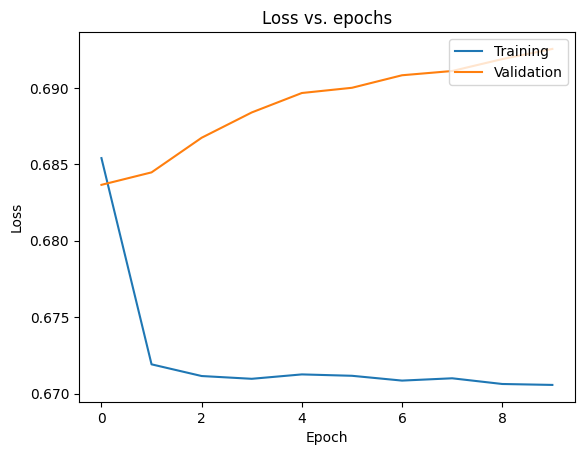

In [130]:
# modelV.compile(
#     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05),
#     loss = tf.keras.losses.BinaryCrossentropy(),
#     metrics = [tf.keras.metrics.BinaryAccuracy()]
# )
# history = modelV.fit(x_train_image_pretrain, Y_reshaped, epochs=10, batch_size=64, validation_split=0.2, verbose=0, callbacks=[checkpointVGG])

# df = pd.DataFrame(history.history)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [129]:
train_loss, train_accuracy = modelV.evaluate(x_train_image_pretrain, Y_reshaped)
loss, accuracy = modelV.evaluate(x_cv_image_pretrain,y_cv_reshaped)

print(f"train loss: {train_loss} | train accuracy: {train_accuracy}")
print(f"test loss: {loss} | test accuracy: {accuracy}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 289s 7s/step - binary_accuracy: 0.5770 - loss: 0.6691
14/14 ━━━━━━━━━━━━━━━━━━━━ 93s 7s/step - binary_accuracy: 0.5157 - loss: 0.7045
train loss: 0.67362380027771 | train accuracy: 0.5688146352767944
test loss: 0.6961497068405151 | test accuracy: 0.5202863812446594


### MobileNet

In [92]:
checkpoint_path_mob = 'model_checkpoints/checkpointMOB.weights.h5'
checkpointmob = ModelCheckpoint(filepath=checkpoint_path_mob,
                             save_freq='epoch',
                             save_best_only=True, 
                             save_weights_only=True,
                             verbose=1)

Model: "functional_115"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 1000)           │     3,538,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │        64,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,603,113 (13.74 MB)

 Trainable params: 64,129 (250.50 KB)

 Non-trainable params: 3,538,984 (13.50 MB)


Epoch 1: val_loss improved from inf to 0.68030, saving model to model_checkpoints/checkpointMOB.weights.h5

Epoch 2: val_loss improved from 0.68030 to 0.66853, saving model to model_checkpoints/checkpointMOB.weights.h5

Epoch 3: val_loss did not improve from 0.66853

Epoch 4: val_loss did not improve from 0.66853

Epoch 5: val_loss did not improve from 0.66853

Epoch 6: val_loss did not improve from 0.66853

Epoch 7: val_loss did not improve from 0.66853

Epoch 8: val_loss did not improve from 0.66853

Epoch 9: val_loss did not improve from 0.66853

Epoch 10: val_loss did not improve from 0.66853

Epoch 11: val_loss did not improve from 0.66853

Epoch 12: val_loss did not improve from 0.66853

Epoch 13: val_loss did not improve from 0.66853

Epoch 14: val_loss did not improve from 0.66853

Epoch 15: val_loss did not improve from 0.66853

Epoch 16: val_loss did not improve from 0.66853

Epoch 17: val_loss did not improve from 0.66853

Epoch 18: val_loss did not improve from 0.66853

Ep

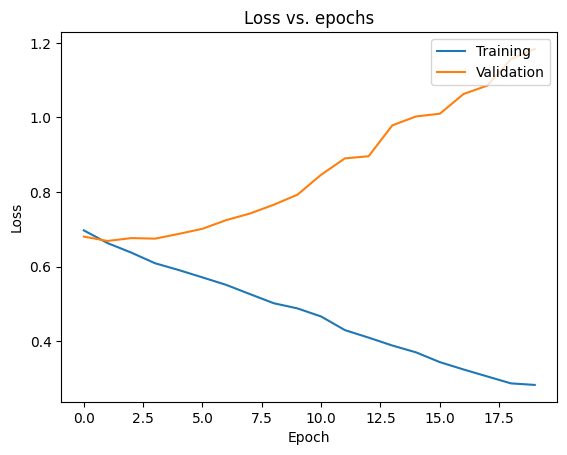

40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 461ms/step - binary_accuracy: 0.8899 - loss: 0.2804
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 447ms/step - binary_accuracy: 0.6089 - loss: 1.1929
train loss: 0.44085606932640076 | train accuracy: 0.8297533988952637
test loss: 1.0488590002059937 | test accuracy: 0.6181384325027466


In [101]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

mob_model = tf.keras.applications.MobileNetV2()

for layer in mob_model.layers:
    layer.trainable = False

# Create new model on top
inputs = Input(shape=(224, 224, 3))
x = mob_model(inputs, training=False)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

modelMOB = Model(inputs, outputs)
modelMOB.summary()



# modelMOB = Sequential()

# for layer in mob_model.layers:
#     modelMOB.add(layer)
    
# # set trainable=False for all layers
# # we don't want to train them again
# for layer in modelMOB.layers:
#     layer.trainable = False
    
# modelMOB.add(Dense(64, activation='relu'))
# modelMOB.add(Dense(1, activation='sigmoid'))
# modelMOB.summary()

modelMOB.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = [tf.keras.metrics.BinaryAccuracy()]
)

history = modelMOB.fit(x_train_image_pretrain, Y_reshaped, epochs=20, batch_size=64, validation_split=0.2, verbose=0, callbacks=[checkpointmob])

df = pd.DataFrame(history.history)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

train_loss, train_accuracy = modelMOB.evaluate(x_train_image_pretrain, Y_reshaped)
loss, accuracy = modelMOB.evaluate(x_cv_image_pretrain,y_cv_reshaped)

print(f"train loss: {train_loss} | train accuracy: {train_accuracy}")
print(f"test loss: {loss} | test accuracy: {accuracy}")

### ResNet

In [95]:
checkpoint_path_RES = 'model_checkpoints/checkpointRES.weights.h5'
checkpointRES = ModelCheckpoint(filepath=checkpoint_path_RES,
                             save_freq='epoch',
                             save_best_only=True, 
                             save_weights_only=True,
                             verbose=1)

Model: "functional_113"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 1000)           │    25,636,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │        64,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,700,841 (98.04 MB)

 Trainable params: 64,129 (250.50 KB)

 Non-trainable params: 25,636,712 (97.80 MB)


Epoch 1: val_loss improved from inf to 0.69573, saving model to model_checkpoints/checkpointRES.weights.h5

Epoch 2: val_loss improved from 0.69573 to 0.69288, saving model to model_checkpoints/checkpointRES.weights.h5

Epoch 3: val_loss did not improve from 0.69288

Epoch 4: val_loss did not improve from 0.69288

Epoch 5: val_loss did not improve from 0.69288

Epoch 6: val_loss did not improve from 0.69288

Epoch 7: val_loss did not improve from 0.69288

Epoch 8: val_loss did not improve from 0.69288

Epoch 9: val_loss did not improve from 0.69288

Epoch 10: val_loss did not improve from 0.69288

Epoch 11: val_loss did not improve from 0.69288

Epoch 12: val_loss did not improve from 0.69288

Epoch 13: val_loss did not improve from 0.69288

Epoch 14: val_loss did not improve from 0.69288

Epoch 15: val_loss did not improve from 0.69288

Epoch 16: val_loss did not improve from 0.69288

Epoch 17: val_loss did not improve from 0.69288

Epoch 18: val_loss did not improve from 0.69288

Ep

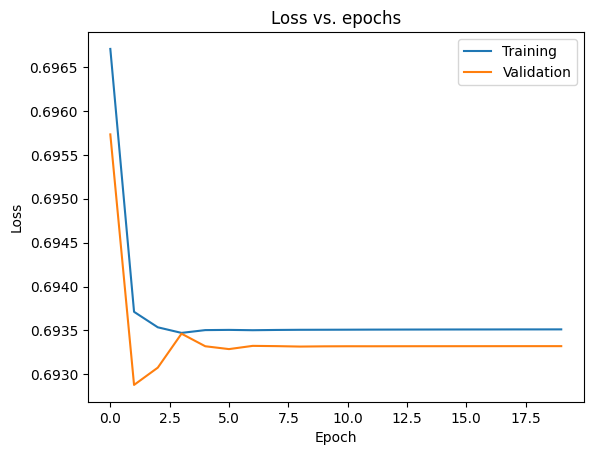

40/40 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - binary_accuracy: 0.4888 - loss: 0.6932
14/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - binary_accuracy: 0.4543 - loss: 0.6934
train loss: 0.693186342716217 | train accuracy: 0.4924423098564148
test loss: 0.6932700276374817 | test accuracy: 0.47494032979011536


In [100]:


resnet_model = tf.keras.applications.ResNet50(weights='imagenet')



for layer in resnet_model.layers:
    layer.trainable = False

# Create new model on top
inputs = Input(shape=(224, 224, 3))
x = resnet_model(inputs, training=False)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

modelRES = Model(inputs, outputs)
modelRES.summary()


# modelRES = Sequential()
# for layer in resnet_model.layers:
#     modelRES.add(layer)
    
# # set trainable=False for all layers
# # we don't want to train them again
# for layer in modelRES.layers:
#     layer.trainable = False
# # model2.add(Flatten())
# modelRES.add(Dense(64, activation='relu'))
# modelRES.add(Dense(1, activation='sigmoid'))
# modelRES.summary()

modelRES.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = [tf.keras.metrics.BinaryAccuracy()]
)

history = modelRES.fit(x_train_image_pretrain, Y_reshaped, epochs=20, batch_size=64, validation_split=0.2, verbose=0, callbacks=[checkpointRES])

df = pd.DataFrame(history.history)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

train_loss, train_accuracy = modelRES.evaluate(x_train_image_pretrain, Y_reshaped)
loss, accuracy = modelRES.evaluate(x_cv_image_pretrain,y_cv_reshaped)

print(f"train loss: {train_loss} | train accuracy: {train_accuracy}")
print(f"test loss: {loss} | test accuracy: {accuracy}")

## Q6. Does using an RNN model improve your accuracies?


In [78]:
tf.keras.backend.clear_session()

In [79]:
X_train_image_BW = X_train_image[:,:,:,0]
x_cv_image_BW = x_cv_image[:,:,:,0]
x_test_image_BW = x_test_image[:,:,:,0]

In [80]:
y_test_reshaped_BW = y_test_reshaped.T
y_test_reshaped_BW.shape

(419, 1)

#### SimpleRNN

In [125]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Input
# model
modelRNN = Sequential()
modelRNN.add(Input(shape=(128,128))) # seq_length, input_size
modelRNN.add(SimpleRNN(128, return_sequences=False, activation='relu')) # N, 128
modelRNN.add(Dense(1, activation = 'sigmoid'))
print(modelRNN.summary())

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,025 (129.00 KB)

 Trainable params: 33,025 (129.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [126]:
modelRNN.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = [tf.keras.metrics.BinaryAccuracy()]
)
history = modelRNN.fit(X_train_image_BW, Y_reshaped, epochs=40, batch_size=64, validation_split=0.2, verbose=1)

df = pd.DataFrame(history.history)

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Loss vs. epochs')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='upper right')
# plt.show()

train_loss, train_accuracy = modelRNN.evaluate(X_train_image_BW, Y_reshaped)
loss, accuracy = modelRNN.evaluate(x_test_image_BW, y_test_reshaped_BW)

print(f"train loss: {train_loss} | train accuracy: {train_accuracy}")
print(f"test loss: {loss} | test accuracy: {accuracy}")


Epoch 1/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - binary_accuracy: 0.5208 - loss: 0.7577 - val_binary_accuracy: 0.5238 - val_loss: 0.6950
Epoch 2/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - binary_accuracy: 0.5098 - loss: 0.7028 - val_binary_accuracy: 0.4524 - val_loss: 0.6946
Epoch 3/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - binary_accuracy: 0.4894 - loss: 0.6925 - val_binary_accuracy: 0.5159 - val_loss: 0.6946
Epoch 4/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - binary_accuracy: 0.5049 - loss: 0.6926 - val_binary_accuracy: 0.4444 - val_loss: 0.7007
Epoch 5/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - binary_accuracy: 0.4912 - loss: 0.6918 - val_binary_accuracy: 0.4643 - val_loss: 0.6987
Epoch 6/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - binary_accuracy: 0.5113 - loss: 0.6879 - val_binary_accuracy: 0.5040 - val_loss: 0.6979
Epoch 7/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - binary_accuracy: 0.5540 - loss: 0.6848 - val_binary_accuracy: 0.4762 - val_loss: 0.7041
Epoch 8/40
16

#### GRU

In [85]:
modelGRU = Sequential()
modelGRU.add(Input(shape=(128,128))) # seq_length, input_size
#model.add(layers.SimpleRNN(128, return_sequences=True, activation='relu')) # N, 28, 128
modelGRU.add(GRU(128, return_sequences=False, activation='relu')) # N, 128
modelGRU.add(Dense(1, activation = 'sigmoid'))
print(modelGRU.summary())

modelGRU.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = [tf.keras.metrics.BinaryAccuracy()]
)
history = modelGRU.fit(X_train_image_BW, Y_reshaped, epochs=40, batch_size=64, validation_split=0.2, verbose=1)

df = pd.DataFrame(history.history)

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Loss vs. epochs')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='upper right')
# plt.show()

train_loss, train_accuracy = modelGRU.evaluate(X_train_image_BW, Y_reshaped)
loss, accuracy = modelGRU.evaluate(x_test_image_BW, y_test_reshaped_BW)

print(f"train loss: {train_loss} | train accuracy: {train_accuracy}")
print(f"test loss: {loss} | test accuracy: {accuracy}")


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,201 (387.50 KB)

 Trainable params: 99,201 (387.50 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - binary_accuracy: 0.4821 - loss: 2.2743 - val_binary_accuracy: 0.5040 - val_loss: 814910.6875
Epoch 2/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - binary_accuracy: 0.5261 - loss: 3.9654 - val_binary_accuracy: 0.5317 - val_loss: 0.8490
Epoch 3/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - binary_accuracy: 0.5182 - loss: 0.8103 - val_binary_accuracy: 0.4643 - val_loss: 0.8615
Epoch 4/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - binary_accuracy: 0.5083 - loss: 0.7585 - val_binary_accuracy: 0.4643 - val_loss: 0.7244
Epoch 5/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - binary_accuracy: 0.4960 - loss: 0.7099 - val_binary_accuracy: 0.4683 - val_loss: 0.7007
Epoch 6/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - binary_accuracy: 0.4603 - loss: 0.7032 - val_binary_accuracy: 0.4643 - val_loss: 0.7035
Epoch 7/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - binary_accuracy: 0.4760 - loss: 0.7018 - val_binary_accuracy: 0.4643 - val_loss: 0.7082
Ep

### LSTM

In [127]:
# model
modelLSTM = Sequential()
modelLSTM.add(Input(shape=(128,128))) # seq_length, input_size
#model.add(layers.SimpleRNN(128, return_sequences=True, activation='relu')) # N, 28, 128
modelLSTM.add(LSTM(128, return_sequences=False, activation='relu')) # N, 128
modelLSTM.add(Dense(1, activation = 'sigmoid'))
print(modelLSTM.summary())

modelLSTM.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = [tf.keras.metrics.BinaryAccuracy()]
)
history = modelLSTM.fit(X_train_image_BW, Y_reshaped, epochs=40, batch_size=64, validation_split=0.2, verbose=1)

df = pd.DataFrame(history.history)

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Loss vs. epochs')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='upper right')
# plt.show()

train_loss, train_accuracy = modelLSTM.evaluate(X_train_image_BW, Y_reshaped)
loss, accuracy = modelLSTM.evaluate(x_test_image_BW, y_test_reshaped_BW)

print(f"train loss: {train_loss} | train accuracy: {train_accuracy}")
print(f"test loss: {loss} | test accuracy: {accuracy}")

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,713 (514.50 KB)

 Trainable params: 131,713 (514.50 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - binary_accuracy: 0.4773 - loss: 0.7082 - val_binary_accuracy: 0.5198 - val_loss: 0.6956
Epoch 2/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - binary_accuracy: 0.5446 - loss: 0.6894 - val_binary_accuracy: 0.5714 - val_loss: 0.6945
Epoch 3/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - binary_accuracy: 0.5583 - loss: 0.6878 - val_binary_accuracy: 0.5516 - val_loss: 0.6957
Epoch 4/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - binary_accuracy: 0.5509 - loss: 0.6846 - val_binary_accuracy: 0.5476 - val_loss: 0.6965
Epoch 5/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - binary_accuracy: 0.5619 - loss: 1396.6010 - val_binary_accuracy: 0.5357 - val_loss: 0.6871
Epoch 6/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - binary_accuracy: 0.5719 - loss: 414485.8750 - val_binary_accuracy: 0.4643 - val_loss: 27001670.0000
Epoch 7/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step - binary_accuracy: 0.4911 - loss: 215648480.0000 - val_binary_accuracy: 0.46